# Energy Usage

### Import Datasets

In [17]:
import pandas as pd
import seaborn as sns; sns.set()
elec_usage_data = pd.read_csv("pc_data.csv")

In [18]:
elec_usage_data.head()

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Region,Age
0,50,67,25,0.86,1,3,North,25
1,45,78,47,0.94,0,1,Center,13
2,47,71,33,0.91,0,2,Center,20
3,42,73,54,0.94,0,1,Center,18
4,36,65,32,0.94,0,2,North,21


In [19]:
elec_usage_data.shape #n_samples=150, n_features=2

(1000, 8)

### Check for Duplicates

In [20]:
elec_usage_data[elec_usage_data.duplicated()]

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Region,Age


There is no duplicated Data

### Check for Missing Values

In [21]:
#check for missing values
temp = pd.DataFrame(elec_usage_data.isnull().sum())
temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(temp.index[temp['Sum'] > 0])) )

Amount of rows with missing values: 0


No missing Values

### Convert categorical to numerical

In [22]:
#elec_usage_data  = elec_usage_data.merge(region_df, left_index=True)
elec_usage_data = pd.get_dummies(elec_usage_data) 
elec_usage_data.head()

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South
0,50,67,25,0.86,1,3,25,0,1,0
1,45,78,47,0.94,0,1,13,1,0,0
2,47,71,33,0.91,0,2,20,1,0,0
3,42,73,54,0.94,0,1,18,1,0,0
4,36,65,32,0.94,0,2,21,0,1,0


### Create new variables

Two new variables will be added:
a) Total EPC
b) Averange EPC

In [23]:
elec_usage_data['Average EPC'] = round(elec_usage_data[["EPC1","EPC2", "EPC3"]].mean(axis=1), 1)
elec_usage_data['Total EPC'] = elec_usage_data[["EPC1","EPC2", "EPC3"]].sum(axis=1)

elec_usage_data

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South,Average EPC,Total EPC
0,50,67,25,0.86,1,3,25,0,1,0,47.3,142
1,45,78,47,0.94,0,1,13,1,0,0,56.7,170
2,47,71,33,0.91,0,2,20,1,0,0,50.3,151
3,42,73,54,0.94,0,1,18,1,0,0,56.3,169
4,36,65,32,0.94,0,2,21,0,1,0,44.3,133
...,...,...,...,...,...,...,...,...,...,...,...,...
995,39,61,30,0.71,0,2,32,0,1,0,43.3,130
996,39,62,37,0.72,0,1,45,0,0,1,46.0,138
997,39,62,30,0.73,0,1,29,0,1,0,43.7,131
998,40,61,40,0.75,0,1,32,0,0,1,47.0,141


In [24]:
elec_usage_data.apply(lambda s: elec_usage_data.corrwith(s))

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South,Average EPC,Total EPC
EPC1,1.000000,-0.188828,0.681828,0.459152,-0.218100,0.025520,-0.057485,0.078595,-0.145914,0.083961,0.587361,0.587394
EPC2,-0.188828,1.000000,-0.298256,-0.019484,-0.235279,-0.600315,0.215872,-0.015619,-0.012884,0.029619,0.606105,0.606105
EPC3,0.681828,-0.298256,1.000000,0.441067,-0.187466,0.069052,-0.019076,0.104616,-0.179352,0.095317,0.522613,0.522595
Usage,0.459152,-0.019484,0.441067,1.000000,-0.452627,-0.331674,-0.183069,0.233438,-0.452123,0.270093,0.388406,0.388337
Payment,-0.218100,-0.235279,-0.187466,-0.452627,1.000000,0.425187,0.043617,-0.117452,0.193178,-0.097968,-0.376582,-0.376564
Calls,0.025520,-0.600315,0.069052,-0.331674,0.425187,1.000000,-0.165043,-0.112714,0.199114,-0.109196,-0.453819,-0.453816
Age,-0.057485,0.215872,-0.019076,-0.183069,0.043617,-0.165043,1.000000,0.020639,-0.007467,-0.012059,0.146397,0.146245
Region_Center,0.078595,-0.015619,0.104616,0.233438,-0.117452,-0.112714,0.020639,1.000000,-0.547314,-0.379205,0.070640,0.070577
Region_North,-0.145914,-0.012884,-0.179352,-0.452123,0.193178,0.199114,-0.007467,-0.547314,1.000000,-0.566875,-0.158596,-0.158481
Region_South,0.083961,0.029619,0.095317,0.270093,-0.097968,-0.109196,-0.012059,-0.379205,-0.566875,1.000000,0.105812,0.105748


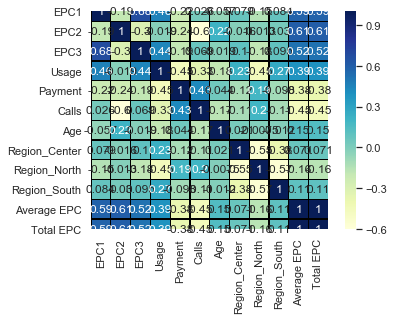

In [25]:
corrmat = elec_usage_data.corr()
sns.heatmap(corrmat, linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

### Strong Correlations:
     · Total EPC with Payments and Calls (-)
     · Regions with other regions (-)
     · Payment with Usage and EPC (-)
     · Calls with EPC2 (-)
     · Age more (+) correlated with EPC2 and (-) with EPC1 and EPC3
     · Usage with EPC (+)
     · 
     
    

## PCA

### Scaling

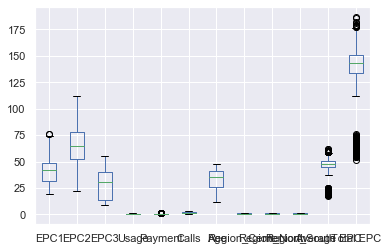

In [26]:
import numpy as np
elec_usage_data.boxplot()

a) scaling method 1: StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler
#normalize the dataset
scaler = StandardScaler()
elec_usage_data_scaled = scaler.fit_transform(elec_usage_data)

In [28]:
elec_usage_data_scaled

array([[ 0.83458251, -0.01936493, -0.29963103, ..., -0.62670381,
         0.17482474,  0.17838673],
       [ 0.38535089,  0.46808179,  1.34792776, ..., -0.62670381,
         1.21177108,  1.20803595],
       [ 0.56504353,  0.15788842,  0.29948126, ..., -0.62670381,
         0.50576506,  0.50934541],
       ...,
       [-0.15372706, -0.24093162,  0.07481415, ..., -0.62670381,
        -0.22230364, -0.22611832],
       [-0.06388074, -0.28524496,  0.82370451, ...,  1.59565012,
         0.14173071,  0.14161354],
       [-0.06388074, -0.24093162,  0.97348258, ...,  1.59565012,
         0.25204415,  0.2519331 ]])

In [29]:
elec_usage_data_scaled_df = pd.DataFrame(elec_usage_data_scaled)
elec_usage_data_scaled_df.columns = elec_usage_data.columns

elec_usage_data_scaled_df.head()

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South,Average EPC,Total EPC
0,0.834583,-0.019365,-0.299631,0.838198,2.859075,1.958966,-0.843981,-0.605079,1.105542,-0.626704,0.174825,0.178387
1,0.385351,0.468082,1.347928,1.131057,-0.349763,-0.260825,-2.066994,1.652678,-0.904534,-0.626704,1.211771,1.208036
2,0.565044,0.157888,0.299481,1.021235,-0.349763,0.849070,-1.353570,1.652678,-0.904534,-0.626704,0.505765,0.509345
3,0.115812,0.246515,1.872151,1.131057,-0.349763,-0.260825,-1.557405,1.652678,-0.904534,-0.626704,1.167646,1.171263
4,-0.423266,-0.107992,0.224592,1.131057,-0.349763,0.849070,-1.251652,-0.605079,1.105542,-0.626704,-0.156116,-0.152572


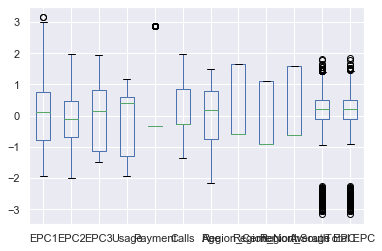

In [63]:
elec_usage_data_scaled_df.boxplot()

b) scaling method 2: Minmax

##### Results: We have 3 different datasets to be tested: 
###### a) "elec_usage_data" - Not scaled dataset  (We will apply PCA only in the scaled datasets)
###### b) "elec_usage_data_scaled_df" - StandardScaler dataset
###### c) "elec_usage_data_scaled_df2" - MinmaxScaler dataset

### PCA fit

b)

In [30]:
import matplotlib.pyplot as plt

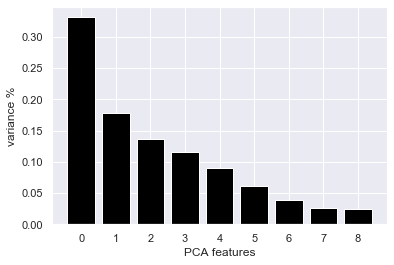

In [31]:
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(elec_usage_data_scaled_df)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


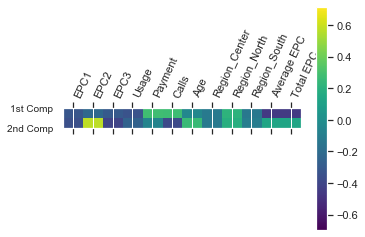

In [32]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(elec_usage_data_scaled_df.columns)),elec_usage_data_scaled_df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [33]:
pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],columns=elec_usage_data_scaled_df.columns)

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South,Average EPC,Total EPC
PC1,-0.320020,-0.216973,-0.293670,-0.335541,0.287042,0.277340,-0.043762,-0.110919,0.216268,-0.129927,-0.455255,-0.455237
PC2,-0.352375,0.578220,-0.404971,-0.250477,-0.055681,-0.380818,0.262575,-0.116479,0.192534,-0.098214,0.136750,0.136753
PC3,0.305472,-0.024029,0.275906,-0.232546,0.155407,0.229906,0.073186,-0.325169,0.597055,-0.340038,0.240490,0.240566
PC4,0.000304,-0.015037,0.013057,-0.013413,-0.034463,-0.026112,0.060578,0.712835,-0.004308,-0.696894,-0.005935,-0.005943
PC5,0.051603,-0.020713,0.135117,-0.251000,0.446486,0.165390,0.718693,0.152602,-0.315739,0.198874,0.070413,0.070279
PC6,0.003143,0.308053,-0.103317,-0.158293,0.576668,0.169418,-0.598999,0.153211,-0.192412,0.061923,0.206082,0.206190
PC7,0.012632,-0.132081,0.038190,0.505751,0.596969,-0.547955,0.062041,-0.092015,0.175539,-0.103505,-0.085677,-0.085684
PC8,0.553353,0.107653,-0.686725,0.318982,0.011895,0.286071,0.156259,-0.006852,0.029288,-0.025636,-0.021363,-0.021390
PC9,0.515968,-0.249549,-0.143242,-0.569934,-0.027517,-0.535139,-0.128559,0.037146,-0.090796,0.063820,-0.066452,-0.066243


#### PC1 --> EPC1, EPC2, EPC3, Total EPC, Usage
#### PC2 --> EPC1, EPC3, Calls, Payment

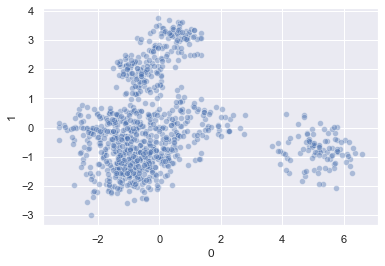

In [18]:
p1=sns.scatterplot(x=PCA_components[0], y=PCA_components[1],
              alpha=.4, 
              data=PCA_components)

c)

In [19]:
# save both PCA's
#df2_pca.to_csv(r'/Users/mireia/Downloads\PCA1.csv', index = True)

from IPython.display import HTML
import base64   

def create_download_link( df, title = "Download CSV file", filename = "PCA1.csv"):  
    csv = df2_pca.to_csv(index =True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df2_pca)

#### *************************************************************************************************************###########################################################################################################333

### K-means

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score 

In [24]:
PCA_components.iloc[:,:2]

,0,1
0,1.171608,-1.127520
1,-2.481639,-1.092441
2,-1.211013,-1.310456
3,-2.486728,-1.215129
4,0.431435,-0.617400
...,...,...
995,0.761518,-0.279121
996,-0.773108,-0.228713
997,0.396069,0.081611
998,-0.937535,-0.722209


In [34]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [57]:
db_default = DBSCAN(eps = 0.95, min_samples = 3)
db = db_default.fit_predict(PCA_components)

In [58]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

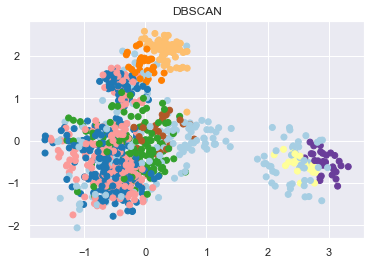

In [66]:
dbscan(PCA_components, eps=1.5, min_samples=15)